# HM 1

# Метадані
Датасет "[Diamonds](https://www.kaggle.com/datasets/shivam2503/diamonds)" містить десять різних атрибутів майже для 54 000 діамантів. \
Завдяки цьому набору даних можемо проаналізувати діаманти за їх огранюванням, кольором, прозорістю, ціною та іншими характеристиками. \
Загальна кількість рядків: 53940. \
Опис по стовбцям:
- carat - вага діаманта (0.2 - 5.01)
- cut - якість огранювання діаманта у порядку зростання (Fair, Good, Very Good, Premium, Ideal)
- color - колір діаманта, де D — найкращий, а J — найгірший
- clarity - міра того, наскільки чистий алмаз (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
- depth - глибина діаманта. Розраховується за формулою $\dfrac{z}{mean(x,\:y)}=\dfrac{2z}{x+y}$ та подається у відсотках (43 - 79).
- table - плоска грань діаманту на його поверхні, яку ви можете побачити, дивлячись на алмаз зверху. Подається у відсотках (43 - 95)
- price - ціна в доларах США (\$326--\$18,823)
- x - довжина в мм (0 - 10.74)
- y - ширина в мм (0 - 58.9)
- z - глибина в мм (0 - 31.8)

![Diamond Depth and Table Percentages](diamond-depth-and-table.png)
# Посилання
[Посилання на датасет тут](https://www.kaggle.com/datasets/shivam2503/diamonds) \
[Поняття Depth та Table](https://www.diamonds.pro/education/diamond-depth-and-table)


In [75]:
import pandas as pd
import numpy as np
import seaborn as sns
from scipy import stats
import matplotlib.pyplot as plt

In [76]:
df = pd.read_csv('diamonds.csv').set_index('Index')

In [77]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
Index,,,,,,,,,,
1,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
2,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
3,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
4,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
5,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53936,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53937,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53938,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56


# HM 2

### Очищаємо датасет від викидів та рядків, що не містять значень.

In [78]:
if df.isnull().values.any():
    missing_values = df.isnull().values.sum()
    print(f'Кількість пропущенних значень: {missing_values}')
    print(df[df.isnull().values])
    df = df.dropna()
else:
    print('Наш Dataset не має пропущених значень.')

Наш Dataset не має пропущених значень.


Наш датасет не має порожніх значень, але деякі рядки з колонок "x", "y" та "z" мають нульові значення. Тому видаляємо їх.

In [79]:
df = df.drop(df[df["x"]==0].index)
df = df.drop(df[df["y"]==0].index)
df = df.drop(df[df["z"]==0].index)
df.shape

(53920, 10)

Переглянемо наявність викідів по графікам.

In [80]:
columns = ['x', 'y', 'z', 'depth', 'table']

threshold = 5

def find_outliers(column):
    mean = column.mean()
    std = column.std()
    return column[(column < mean - threshold * std) | (column > mean + threshold * std)]

def outliers():
    for i, col in enumerate(columns):
        outliers = find_outliers(df[col])

        plt.figure(figsize=(6, 4))
        plt.plot(df.index, df[col], label=col, linestyle='', marker='o', markersize=5)
        plt.scatter(outliers.index, outliers, color='red', label=f'Outliers in {col}')

        plt.legend()
        plt.title(f'Outliers in the column {col}')
        plt.xlabel('Line number')
        plt.ylabel('Value')
        plt.grid(True)
        plt.show()

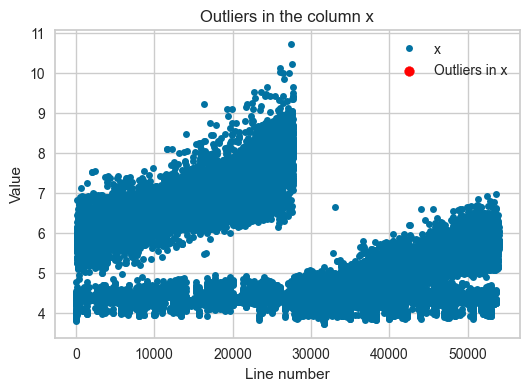

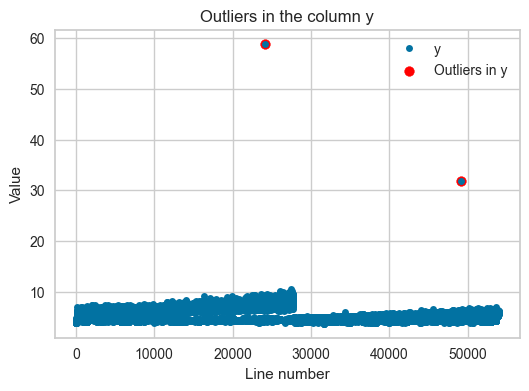

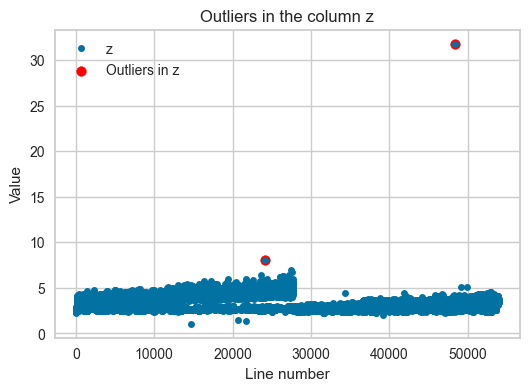

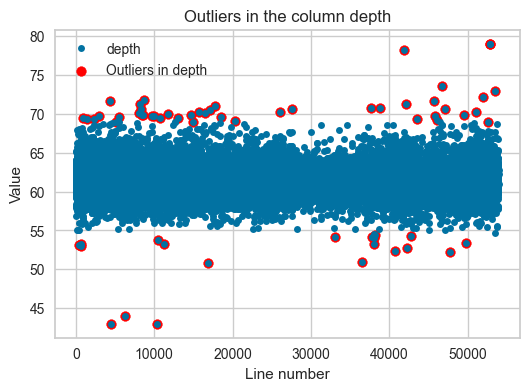

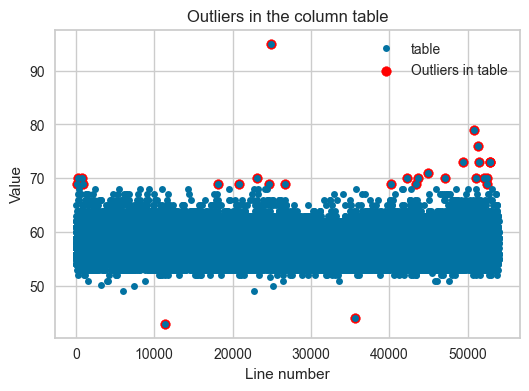

In [81]:
outliers()

Бачимо, що викиди є, але ми будемо видаляти їх вручну. Тобто будемо самі задави значення для граничних умов всіх параметрів. Адже деяких з них не є викидами. \
Видаляємо викиди.

In [82]:
df = df[(df["depth"]<75)&(df["depth"]>45)]
df = df[(df["table"]<80)&(df["table"]>45)]
df = df[(df["x"]<30)]
df = df[(df["y"]<30)]
df = df[(df["z"]<30)&(df["z"]>2)]

Переглядаємо повторно графіки.

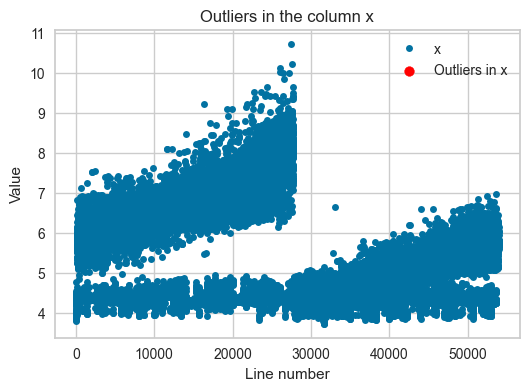

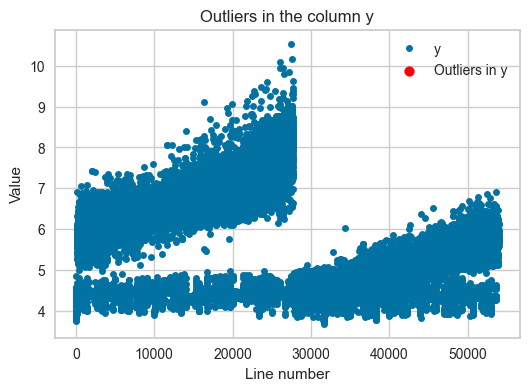

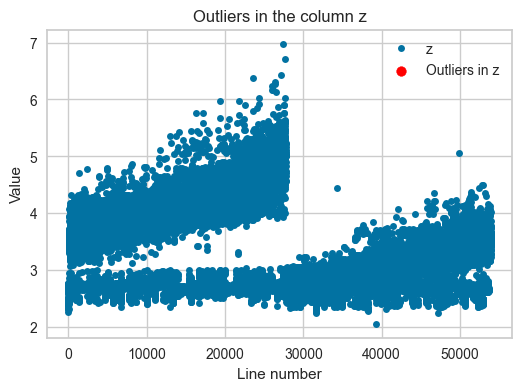

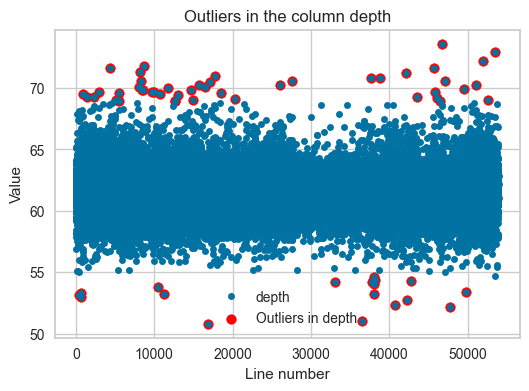

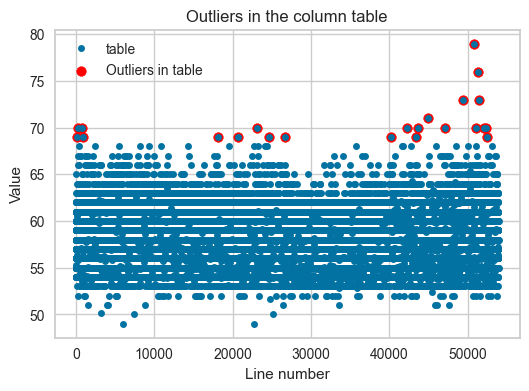

In [83]:
outliers()

### Порахувати середнє, усічене середнє, медіану, дисперсією, стандартне відхилення, середнє відхидення, абсолютно медіане відхилення.

In [84]:
digit_columns = ['carat', 'depth', 'table', 'price', 'x', 'y', 'z']
med = df[digit_columns].median()
statistics_dict = {
    'mean': df[digit_columns].mean(),
    'trimmed_mean': stats.trim_mean(df[digit_columns], 0.01),
    'median': df[digit_columns].median(),
    'variance': df[digit_columns].var(),
    'std_deviation': df[digit_columns].std(),
    'mean_deviation': (df[digit_columns] - df[digit_columns].mean()).abs().mean(),
    'absolute_median_deviation': (df[digit_columns] - med).abs().median()
}

Оскільки вивід у стандартний потік виводу обмежений. Зберігаємо всі дані у файл. \
Надалі можемо переглянути файл або за необхідності вивести окремий параметр в середовищі розробки.

In [85]:
with open('statistics.txt', 'w') as file:
    for key, value in statistics_dict.items():
        print(f'{key}: {value}', file=file)

In [86]:
print(statistics_dict['mean'])

carat       0.797633
depth      61.749700
table      57.456466
price    3930.628810
x           5.731478
y           5.733307
z           3.539448
dtype: float64


In [87]:
print(statistics_dict['variance'])

carat    2.244557e-01
depth    2.016769e+00
table    4.948705e+00
price    1.589813e+07
x        1.253013e+00
y        1.234878e+00
z        4.780789e-01
dtype: float64


In [88]:
df['carat'].max()

5.01

### Нормалізувати дані мін. мах та середня нормалізація. 

In [89]:
df_norm = df[digit_columns]

((df_norm-df_norm.min())/(df_norm.max()-df_norm.min())).to_csv(r'min_max_normalization.csv')

In [90]:
((df_norm-df_norm.mean())/df_norm.std()).to_csv(r'mean_normalization.csv')

In [91]:
df_min_max_normalization = pd.read_csv('min_max_normalization.csv')
df_min_max_normalization

,Index,carat,depth,table,price,x,y,z
0,1,0.006237,0.469298,0.200000,0.000000,0.031384,0.043732,0.075203
1,2,0.002079,0.394737,0.400000,0.000000,0.022825,0.023324,0.050813
2,3,0.006237,0.267544,0.533333,0.000054,0.045649,0.056851,0.050813
3,4,0.018711,0.508772,0.300000,0.000433,0.067047,0.080175,0.115854
4,5,0.022869,0.548246,0.300000,0.000487,0.087019,0.097668,0.140244
...,...,...,...,...,...,...,...,...
53900,53936,0.108108,0.438596,0.266667,0.131427,0.288160,0.303207,0.292683
53901,53937,0.108108,0.539474,0.200000,0.131427,0.279601,0.301749,0.315041
53902,53938,0.103950,0.526316,0.366667,0.131427,0.275321,0.291545,0.304878
53903,53939,0.137214,0.447368,0.300000,0.131427,0.345221,0.355685,0.341463


In [92]:
df_mean_normalization = pd.read_csv('mean_normalization.csv')
df_mean_normalization

,Index,carat,depth,table,price,x,y,z
0,1,-1.198125,-0.175829,-1.104244,-0.904040,-1.591485,-1.577778,-1.604564
1,2,-1.240340,-1.372903,1.592908,-0.904040,-1.645086,-1.703762,-1.778117
2,3,-1.198125,-3.414970,3.391010,-0.903789,-1.502150,-1.496788,-1.778117
3,4,-1.071481,0.457916,0.244332,-0.902033,-1.368148,-1.352806,-1.315310
4,5,-1.029266,1.091660,0.244332,-0.901782,-1.243078,-1.244820,-1.141757
...,...,...,...,...,...,...,...,...
53900,53936,-0.163863,-0.668742,-0.205193,-0.294346,0.016547,0.024021,-0.057052
53901,53937,-0.163863,0.950828,-1.104244,-0.294346,-0.037055,0.015022,0.102038
53902,53938,-0.206078,0.739580,1.143383,-0.294346,-0.063855,-0.047970,0.029724
53903,53939,0.131641,-0.527910,0.244332,-0.294346,0.373887,0.347980,0.290053


# HM 3
##### Мета: кластерний аналіз датасету.
### Метод к-середніх:

Визначаємо оптимальну кількість кластерів за допомогою методу ліктя (Elbow Method).

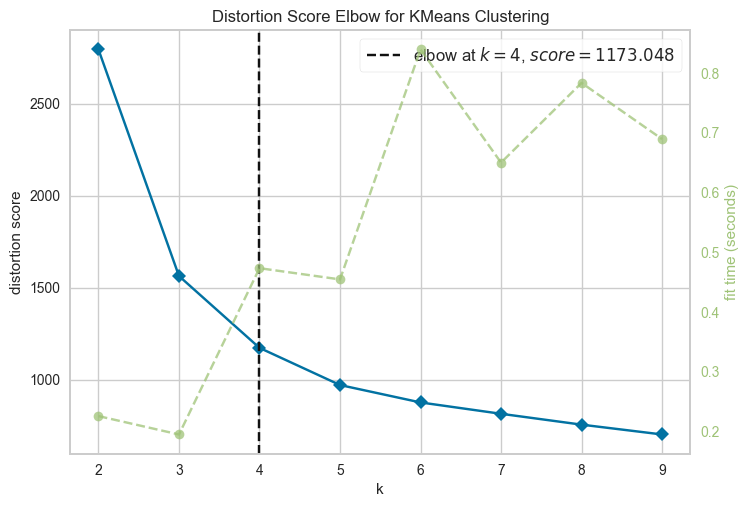

In [93]:
from sklearn.cluster import KMeans
from yellowbrick.cluster import KElbowVisualizer

df_clust_kmean = df_min_max_normalization[['carat', 'depth', 'table', 'price', 'x', 'y', 'z']] 

model = KMeans(random_state=1)
visualizer = KElbowVisualizer(model, k=(2,10))

visualizer.fit(df_clust_kmean)
visualizer.show()
plt.show()

З графіку видно, що оптимальна кількість кластерів для нас буде дорівнювати 4.

1. Кластеризуємо за оптимальною кількістью кластерів.
2. Створюємо та виводимо таблицю з цетрами кластерів та кількістю елементів.

In [94]:
optimal_k = 4

kmeans = KMeans(n_clusters=optimal_k, random_state=0)
kmeans.fit(df_clust_kmean)

df_clust_kmean['cluster'] = kmeans.labels_

cluster_centers = pd.DataFrame(kmeans.cluster_centers_, columns=df_clust_kmean.columns[:-1])
cluster_centers['count'] = df_clust_kmean['cluster'].value_counts().sort_index()

cluster_centers

,carat,depth,table,price,x,y,z,count
0,0.091305,0.479142,0.278056,0.101747,0.254041,0.267694,0.272969,14697
1,0.321937,0.477210,0.299050,0.684921,0.565401,0.583607,0.545188,5968
2,0.029933,0.478770,0.264684,0.024980,0.108750,0.119782,0.145294,17584
3,0.185814,0.484116,0.298263,0.286435,0.407037,0.422400,0.408192,15656


Центр кластера визначається як середнє значення всіх точок, які входять до цього кластера. \
Використовуємо метод kmeans.cluster_centers_

Відображаємо кластери.

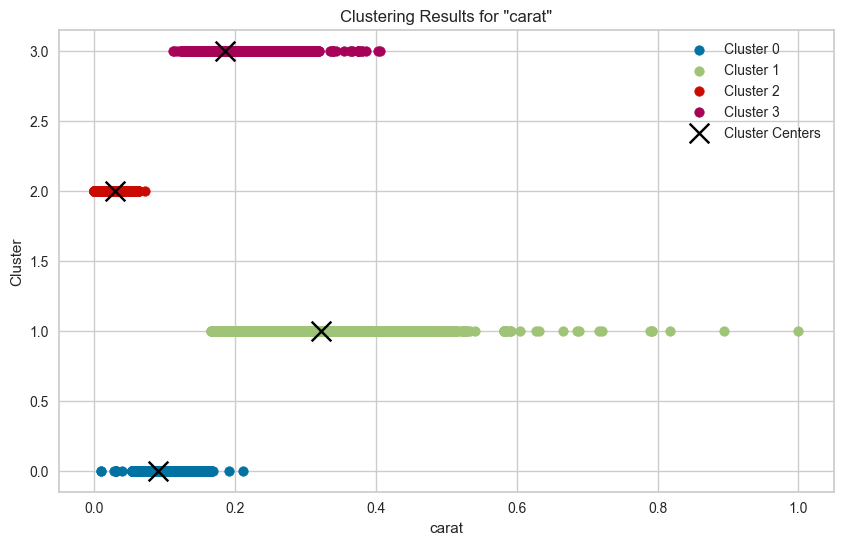

In [95]:
carat_data = df_clust_kmean['carat']
cluster_data = df_clust_kmean['cluster']

cluster_centers_carat = cluster_centers['carat']

plt.figure(figsize=(10, 6))

for cluster in range(optimal_k):
    plt.scatter(carat_data[cluster_data == cluster], cluster_data[cluster_data == cluster], label=f'Cluster {cluster}')

plt.scatter(cluster_centers_carat, range(optimal_k), color='black', marker='x', s=200, label='Cluster Centers')

plt.xlabel('carat')
plt.ylabel('Cluster')
plt.legend()
plt.title('Clustering Results for "carat"')

plt.show()

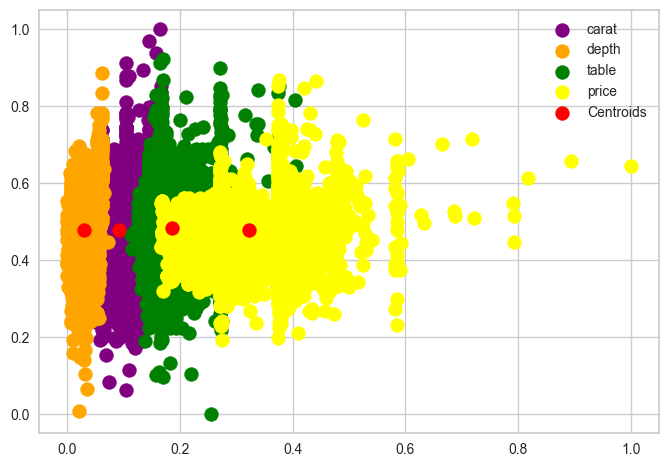

In [96]:
y_kmeans = kmeans.fit_predict(df_clust_kmean)

x = df_clust_kmean.iloc[:, [0, 1, 2, 3]].values

plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], s = 100, c = 'purple', label = 'carat')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], s = 100, c = 'orange', label = 'depth')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1], s = 100, c = 'green', label = 'table')
plt.scatter(x[y_kmeans == 3, 0], x[y_kmeans == 3, 1], s = 100, c = 'yellow', label = 'price')

plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], s = 100, c = 'red', label = 'Centroids')

plt.legend()

### Ієрархічний метод:

Відображаємо дендограму. \
Довелось штучно обмежити df_clust_linkage розміров в 1000 елментів, оскільки для більших чисел витрати на побудову досить великі.

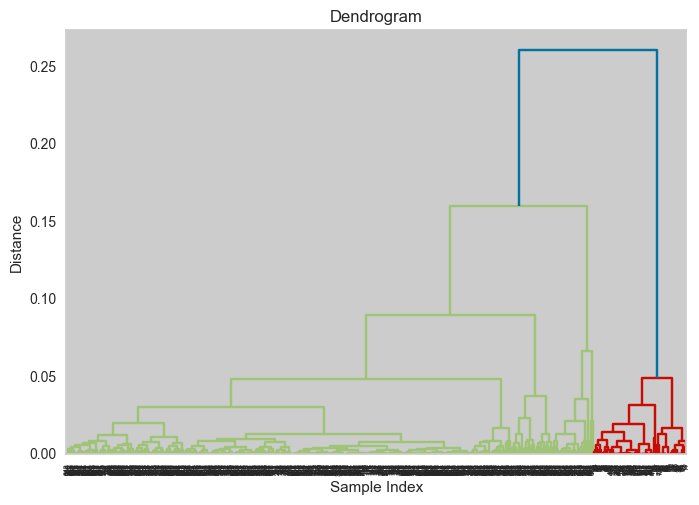

In [97]:
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

df_clust_linkage = df_min_max_normalization[['carat', 'price']][:1000]

linked = linkage(df_clust_linkage, method='complete', metric='euclidean')
dendrogram(linked, orientation='top', distance_sort='descending', show_leaf_counts=True)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

In [98]:
labels = fcluster(linked, 5, criterion='maxclust')

df_clust_linkage['cluster'] = labels
cluster_counts = df_clust_linkage['cluster'].value_counts().sort_index()
print(cluster_counts)

1    150
2      7
3     59
4     67
5    717
Name: cluster, dtype: int64


In [99]:
from sklearn.cluster import KMeans

# Виконуємо кластеризацію методом k-середніх
kmeans = KMeans(n_clusters=4, random_state=0).fit(df_clust_linkage)
df_clust_linkage['KMeans_Cluster'] = kmeans.labels_

# Порівнюємо кількість та збалансованість кластерів
hierarchical_cluster_counts = df_clust_linkage['cluster'].value_counts().reset_index()
hierarchical_cluster_counts.columns = ['cluster', 'Hierarchical_Count']

kmeans_cluster_counts = df_clust_linkage['KMeans_Cluster'].value_counts().reset_index()
kmeans_cluster_counts.columns = ['cluster', 'KMeans_Count']

print(hierarchical_cluster_counts)
print(kmeans_cluster_counts)

   cluster  Hierarchical_Count
0        5                 717
1        1                 150
2        4                  67
3        3                  59
4        2                   7
   cluster  KMeans_Count
0        2           717
1        1           150
2        0            67
3        3            66


Кластери для цих двох методів вийшли збалансовані.

# HM 4
### Вибрати з дз №3 два кластера з найбільшою кількістю елементів.
З таблиці бачимо, що найбільшу кількість елементів має 3 та 4 кластери по індексам. (в таблиці це рядки 2 та 3 відповідно)

In [100]:
cluster_centers

,carat,depth,table,price,x,y,z,count
0,0.091305,0.479142,0.278056,0.101747,0.254041,0.267694,0.272969,14697
1,0.321937,0.477210,0.299050,0.684921,0.565401,0.583607,0.545188,5968
2,0.029933,0.478770,0.264684,0.024980,0.108750,0.119782,0.145294,17584
3,0.185814,0.484116,0.298263,0.286435,0.407037,0.422400,0.408192,15656


Виокремлюємо ці кластери в інший DataFrame.

In [101]:
df_clusters = df_clust_kmean[df_clust_kmean['cluster'].isin([2, 3])]

### Класифікувати методом опорних векторів.
Для цього оберемо стовпці `carat` та `depth`. \
Перевіримо за допомогою коефіцієнта кореляції чи є наші дані лінійно залежними. 

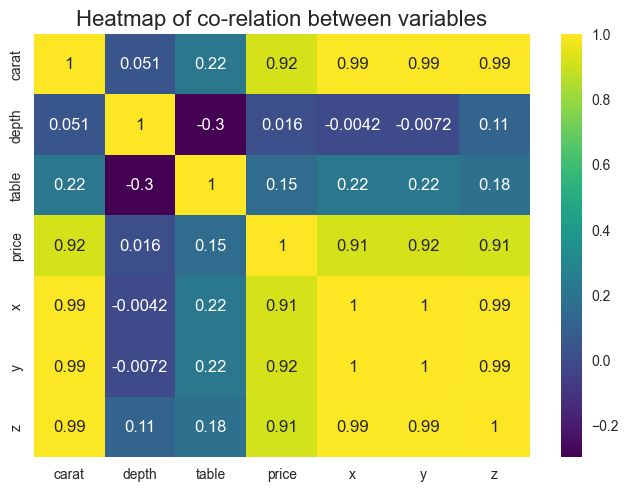

In [102]:
sns.heatmap(df_clusters.drop('cluster', axis=1).corr(),annot=True,cmap='viridis')
plt.title('Heatmap of co-relation between variables',fontsize=16)
plt.show()

З таблиці бачимо, що дані не є лінійно залежними. Тому для методу опорних векторів будемо використовувати поліноміальне ядро. 

In [103]:
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score

X = df_clusters[['carat', 'depth']]
y = df_clusters['cluster']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

svm = SVC(kernel='poly', degree=3)

svm.fit(X_train, y_train)

SVC(kernel='poly')

Поліноміальне ядро має такий вигляд: 
$$k(x,\: x')=(\langle x,\: x'\rangle+const)^d$$
$\langle ...\rangle$ - скалярний добуток. \
$x,\: x'$ - вхідні дані. \
$const$ - визначає, наскільки віддалено від початку координат розташована результуюча гіперплощина. За замовчуванням дорівнює нулю. \
$d$ - ступінь полінома, який буде застосований до даних. \
Ступінь полінома визначає наскільки складною буде апроксимація даних у вищорозмірному просторі. Нижній ступінь полінома (d = 1) робить перетворення більш лінійними, тоді як вищий ступінь полінома (d = 2, 3, 4 і т.д.) дозволяє моделі більш точно вираховувати складні закономірності в даних.

In [104]:
y_pred = svm.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Точність класифікації: {accuracy}')

Точність класифікації: 1.0


c:\Users\alexi\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\base.py:450: UserWarning: X does not have valid feature names, but SVC was fitted with feature names
  warnings.warn(


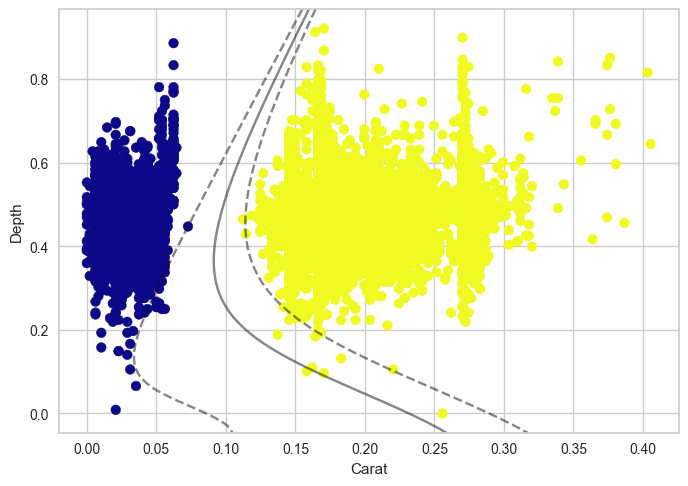

In [105]:
plt.scatter(X['carat'], X['depth'], c=y, cmap='plasma')
ax = plt.gca()
xlim = ax.get_xlim()
ylim = ax.get_ylim()
xx, yy = np.meshgrid(np.linspace(xlim[0], xlim[1], 100), np.linspace(ylim[0], ylim[1], 100))
Z = svm.decision_function(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contour(xx, yy, Z, colors='k', levels=[-1, 0, 1], alpha=0.5, linestyles=['--', '-', '--'])
plt.xlabel('Carat')
plt.ylabel('Depth')
plt.show()